# Spike Train Analysis with NWB and Elephant

Elephant is a toolbox for the analysis of electrophysiological data based on the Neo framework.

This tutorial we are going to:
1. Load a Neurodata Without Borders File from the Allen Datbase, 
2. Display its timeseries data
3. Display its spike time data
4. Perform some Analysis

In [1]:
# Load Python Packages
import h5py
import matplotlib.pyplot as plt
import neo
import numpy as np
import elephant
from quantities import Hz, s, ms
import seaborn as sns

## Get an NWB File

We are going to use a generic NWB file from the brain-map database, for example the file here:
http://celltypes.brain-map.org/experiment/electrophysiology/474626527

In [2]:
# Load a NWB File
nwb = h5py.File('data/nwb/474626524_ephys.nwb')

In [3]:
# Inspect the Data File
nwb.keys()

# Find all the time series data
sweeps= nwb['acquisition']['timeseries'].keys()

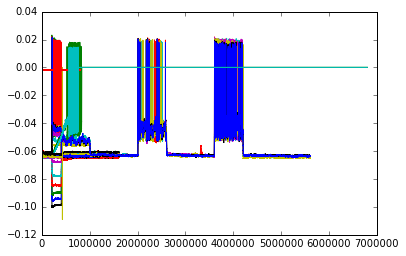

In [4]:
# Locate the time series recoding of interest
for sw in sweeps:
    plt.plot(nwb['acquisition']['timeseries'][sw]['data'][:])
plt.show()

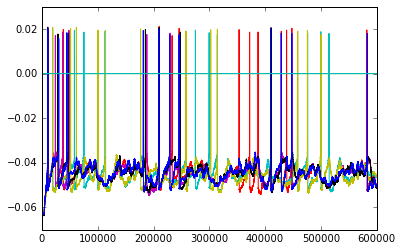

In [5]:
# Locate the time series recoding of interest
lines = []
for sw in sweeps:
    lines.append(plt.plot(nwb['acquisition']['timeseries'][sw]['data'][2000000:2600000],label=s)[0])
    
#plt.legend(handles=lines)

plt.show()

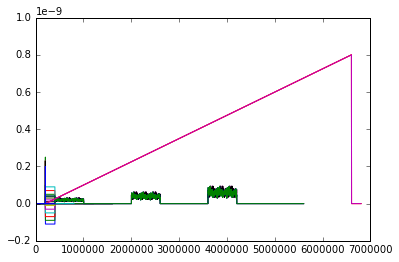

In [7]:
# Locate the stimulus recoding of interest
for sw in sweeps:
    plt.plot(nwb['stimulus']['presentation'][sw]['data'][:])
plt.show()


In [8]:
# Find the associated spike times
nwb['analysis']['spike_times']['Sweep_46'][:]


array([10.0509  , 10.15009 , 10.2229  , 10.907575, 11.04677 , 11.144015,
       11.22804 , 12.048435, 12.1438  , 12.23821 , 12.914835, 18.041035,
       18.05377 , 18.085825, 18.123865, 18.147125, 18.175   , 18.21806 ,
       18.240265, 18.297215, 18.34516 , 18.39586 , 18.4527  , 18.598285,
       18.658155, 18.763575, 18.820025, 18.85728 , 18.899725, 18.93431 ,
       19.034905, 19.06996 , 19.12284 , 19.159975, 19.189855, 19.22471 ,
       19.397015, 19.4651  , 19.606965, 19.66107 , 19.82679 , 19.906345,
       19.936675, 20.036285, 20.0713  , 20.11868 , 20.151895, 20.18192 ,
       20.219435, 20.243215, 20.30533 , 20.601135, 20.659835, 20.821705,
       20.86303 , 20.904455, 20.938135])

In [9]:
# Convert our spike time sweeps into Spike Trains we can analise
spiketrain_list = [neo.SpikeTrain(nwb['analysis']['spike_times'][sweep][:], units='sec', t_stop=100.0) for sweep in nwb['analysis']['spike_times'].keys()]

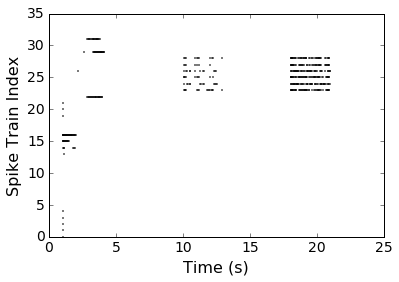

In [10]:
# Plot Spike Trains in the File
for i, spiketrain in enumerate(spiketrain_list):
        t = spiketrain.rescale(s)
        plt.plot(t, i * np.ones_like(t), 'k.', markersize=2)

plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Spike Train Index', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.show()

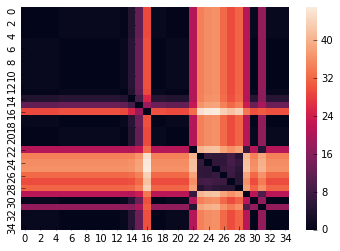

In [11]:
# Calculate Spike Dissimilarity
dissim = elephant.spike_train_dissimilarity.van_rossum_dist(spiketrain_list)
sns.heatmap(dissim)
plt.show()


# Task: Calculate a PSTH
1. Select neurons with a step input

2. Extract Stimulus Aligned Spike Times

3. Plot Spike TimeHistogram



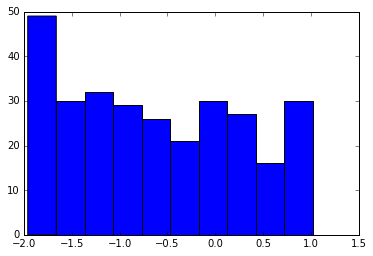

In [12]:
# For each sweep, append each spike time that happens between the stimulus onset and a fixed period
sweep_spikes = [ nwb['analysis']['spike_times'][sweep][:] for sweep in nwb['analysis']['spike_times'].keys()]
spike_times = []
stimulus_onset = 20
for sweep in sweep_spikes:
    for spike in sweep:
        if spike < 40 and spike> 15:
            spike_times.append(spike - stimulus_onset)

plt.hist(spike_times)
plt.xlim=((-5,20))
plt.show()
